# Laboratorium 7 - Dekompozycja spektralna

##### Aleksandra Mazur

## Zadanie 1 Metoda potęgowa

Napisz funkcję obliczającą metodą potęgową dominującą wartość własną (największą co do modułu) i odpowiadający jej wektor własny dla danej macierzy rzeczywistej symetrycznej. Sprawdź poprawność działania programu porównując własną implementację z wynikami funkcji bibliotecznej. Przedstaw na wykresie zależność czasu obliczeń od rozmiaru macierzy (rozmiary macierzy 100x100, 500x500, ...).
* Powtarzaj mnożenie wektora $x_i$ przez macierz ***A***: $$x_{i+1} = A x_i$$ dzieląc za każdym razem wektor wynikowy przez $||x_{i+1}||_{\infty}$
* Element wektora $x_{i}$ o największej wartości bezwzględnej zbiega do dominującej wartości własnej
* Przeskalowany wektor $x_i$ zbiega do dominującego wektora własnego
* Obliczenia powinny zatrzymać się po przekroczeniu maksymalnej liczby iteracji, albo w przypadku gdy $||x_i - x_{i+1}||<{\epsilon}$ (kryterium małej poprawki)
* Pod koniec obliczeń znormalizuj otrzymany wektor własny

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.linalg
import scipy.sparse.linalg

Funkcja ***get_random_symmetric_matrix*** zwraca symetryczną macierz o danym rozmiarze, wypełnioną losowymi wartościami.

In [2]:
def get_random_symmetric_matrix(matrix_size):
    matrix = np.random.rand(matrix_size, matrix_size)
    return (matrix + matrix.T)/2

Poniżej przedstawiono przykładową, symetryczną macierz.

In [3]:
test_matrix = get_random_symmetric_matrix(5)
print(test_matrix)

[[0.41752661 0.20794627 0.73187812 0.63263782 0.67729113]
 [0.20794627 0.05598711 0.9293712  0.56583004 0.45938443]
 [0.73187812 0.9293712  0.78924978 0.45873826 0.35566719]
 [0.63263782 0.56583004 0.45873826 0.94216746 0.73790428]
 [0.67729113 0.45938443 0.35566719 0.73790428 0.16619325]]


Pomocnicza funkcja ***max_abs*** przyjmuje macierz i zwraca największą, bezwzględną wartość występującą w danej macierzy.

In [4]:
def max_abs(A):
    return np.amax(abs(A)) 

Funkcja ***library_power_method*** jako argument przyjmuje macierz i oblicza metodą potęgową dominującą wartość własną, używając funkcji bibliotecznych *numpy.linalg.eig* i *numpy.linalg.norm*. 

In [5]:
def library_power_method(matrix):
    vectors = np.linalg.eig(matrix)[1].T
    norms = map(np.linalg.norm, vectors)
    norms = map(abs, norms)
    max_index = np.argmax(norms)
    val = max_abs(vectors[max_index])
    vec = vectors[max_index]
    return val, vec

Funkcja ***my_power_method*** przyjmuje trzy argumenty: macierz *matrix*, dokładność obliczeń *eps* i maksymalną liczbę iteracji *max_iterations*. Używając metody potęgowej oblicza i zwraca wartość własną i odpowiadający jej wektor własny danej macierzy oraz ilość operacji potrzebną do uzyskania tego wyniku.

In [6]:
def my_power_method(matrix, eps = 1e-8, max_iterations = 1000):
    A = np.ones((matrix.shape[0], 1))
    B = np.random.rand(matrix.shape[0], 1)
    
    i = 0
    while i < max_iterations:
        if np.linalg.norm(B - A) < eps:
            return max_abs(B), B.T[0], i
        A = B
        B = matrix.dot(A)
        B /= np.linalg.norm(B) #  normalize
        i += 1
    
    val = max_abs(A)
    A = A / np.linalg.norm(A)
    vec = A.T[0]
    return val, vec, i

Poniżej przetestowano powyższe funkcje dla wcześniej wygenerowanej macierzy.

In [7]:
print(library_power_method(test_matrix))
print(my_power_method(test_matrix))

(0.5249981479736752, array([-0.42895626, -0.37075331, -0.50513381, -0.52499815, -0.38438949]))
(0.524998148093138, array([0.42895626, 0.37075331, 0.50513381, 0.52499815, 0.38438949]), 13)


Jak widać powyżej funkcja *library_power_method* i funkcja *my_power_method* zwracają taką samą wartość własną oraz wektor własny (pomijając znaki) z dokładnością $10^{-8}$.

Funkcja ***compare_power_methods*** przyjmuje rozmiar macierzy *N*, wektory czasów *my_times* i *lib_times* osiąganych odpowiednio przez funkcje *my_power_method* i *library_power_method* oraz dokładność obliczeń *eps*. Tworzy ona symetryczną macierz o danym rozmiarze, a następnie porównuje czasy i wyniki działania wspomnianych wcześniej funkcji.

In [8]:
def compare_power_methods(N, my_times, lib_times, eps = 10 ** (-8)):
    matrix = get_random_symmetric_matrix(N) 
    
    start = time.time()
    my_val, my_vec, my_iterations = my_power_method(matrix)
    end = time.time()
    my_time = end - start
    
    start = time.time()
    lib_val, lib_vec = library_power_method(matrix)
    end = time.time()
    lib_time = end - start
    
    # compare vectors
    same_vec = True
    for vec_diff in abs(my_vec) - abs(lib_vec):
        if vec_diff >= eps:
            same_vec = False
            break
    
    # compare values
    same_val = abs(my_val - lib_val) < eps
    
    print(f"Matrix {N}x{N}, values matching: {same_val and same_vec}")
    print(f"My function time: {my_time}s")
    print(f"Library function_time: {lib_time}s")
    print(f"Number of iterations: {my_iterations}")
    print("\n")
    
    my_times.append(my_time)
    lib_times.append(lib_time)

In [9]:
def test_power_methods():
    my_times = []
    lib_times = []
    sizes = [x * 100 for x in range(1, 11)]
    for size in sizes:
        compare_power_methods(size, my_times, lib_times)
    
    plt.plot(sizes, my_times, label='my function')
    plt.legend()
    plt.show()
    
    plt.plot(sizes, my_times, label='my function')
    plt.plot(sizes, lib_times, label='library function')
    plt.legend()
    plt.show()
    
    return my_times, lib_times

### Porównanie zaimplementowanej i bibliotecznej funkcji:

Matrix 100x100, values matching: True
My function time: 0.000997781753540039s
Library function_time: 0.007977962493896484s
Number of iterations: 8


Matrix 200x200, values matching: True
My function time: 0.0010004043579101562s
Library function_time: 0.026929140090942383s
Number of iterations: 7


Matrix 300x300, values matching: True
My function time: 0.0s
Library function_time: 0.04387950897216797s
Number of iterations: 7


Matrix 400x400, values matching: True
My function time: 0.0s
Library function_time: 0.07676243782043457s
Number of iterations: 7


Matrix 500x500, values matching: True
My function time: 0.000997781753540039s
Library function_time: 0.13862919807434082s
Number of iterations: 6


Matrix 600x600, values matching: True
My function time: 0.0009677410125732422s
Library function_time: 0.2563145160675049s
Number of iterations: 6


Matrix 700x700, values matching: True
My function time: 0.002003192901611328s
Library function_time: 0.46474671363830566s
Number of iterations:

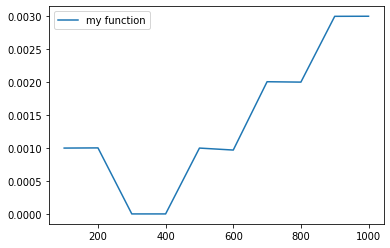

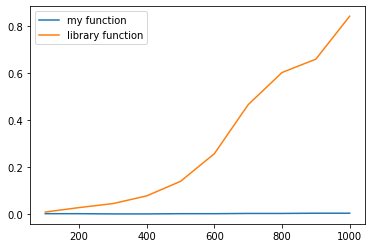

In [10]:
my_times_1, lib_times_1 = test_power_methods()

### Wnioski:
* czas działania funkcji bibliotecznej rośnie wraz ze zwiększaniem rozmiaru macierzy
* czas działania zaimplementowanej funkcji nie jest ani ściśle rosnący, ani malejący, ale wydaje się, że będzie rosnął wraz ze zwiększaniem rozmiaru macierzy
* zaimplementowana funkcja ma krótszy czas działania niż funkcja biblioteczna
* zaimplementowana funkcja i funkcja biblioteczna zwracają taki sam wynik z dokładnością $10^{-8}$
* zaimplementowana funkcja potrzebuje około 6-8 operacji, aby osiągnąć wynik z podaną wyżej dokładnością dla macierzy o rozmiarach od 100 x 100 do 1000 x 1000

## Zadanie 2  Odwrotna metoda potęgowa

Opierając się na twierdzeniu transformacji widma macierzy:

**Twierdzenie 1** Macierz $(A - \sigma I)^{-1}$ (jeśli istnieje), to ma wartości własne równe $\frac{1}{\lambda _k- \sigma}$ ($\lambda _k$ jest k-tą wartością macierzy **A**) i wektory własne identyczne z macierzą **A**.

oraz wykorzystując metodę potęgową i faktoryzację **LU** zaimplementuj odwrotną metodę potęgową pozwalającą na szybkie znalezienie wektorów własnych macierzy **A**, dla wartości $\sigma$ bliskich odpowiadającej wartości własnej. Wykorzystaj fakt, że mnożenie wektora $x_i$ przez macierz $A^{-1} (x_{i+1} = A^{-1}x_i)$ odpowiada rozwiązaniu układu równań $A x_{i+1}=x_i$.


Funkcja ***inverse_power_method*** wykorzystując odwrotną metodę potęgową, znajduje wartość własną i wektor własny danej macierzy *matrix* z dokładnością *eps*.

In [11]:
def inverse_power_method(matrix, sigma, eps = 1e-8, max_iterations = 1000):
    A = np.random.rand(matrix.shape[0], 1)
    A /= np.linalg.norm(A)
    LU = scipy.linalg.lu_factor(matrix - sigma * np.identity(matrix.shape[0]))
    
    i = 0
    while i < max_iterations:
        B = A
        A = scipy.linalg.lu_solve(LU, B)
        A /= np.linalg.norm(A)
        if np.linalg.norm(B - A) < eps or np.linalg.norm(B + A) < eps:
            return matrix.dot(A)[0] / A[0], A, i
        i += 1
    
    print("Max number of iterations exceeded")

Funkcja ***compare_inverse_power_methods*** przyjmuje rozmiar macierzy *N*, wektory czasów *my_times* i *lib_times* osiąganych odpowiednio przez funkcję *inverse_power_method* i funkcję biblioteczną *scipy.sparse.linalg.eigs* oraz dokładność obliczeń *eps*. Tworzy ona symetryczną macierz o danym rozmiarze, a następnie porównuje czasy i wyniki działania wspomnianych wcześniej funkcji.

In [12]:
def compare_inverse_power_methods(N, my_times, lib_times, eps = 10 ** (-8)):
    matrix = get_random_symmetric_matrix(N) 
    
    start = time.time()
    lib_val, lib_vec = scipy.sparse.linalg.eigs(matrix, k=1, sigma=eps)
    end = time.time()
    lib_time = end - start
    
    start = time.time()
    my_val, my_vec, my_iterations = inverse_power_method(matrix, eps + lib_val)
    end = time.time()
    my_time = end - start
    
    # compare vectors
    same_vec = True
    for vec in abs(my_vec) - abs(lib_vec):
        if vec >= eps:
            same_vec = False
            break
    
    #compare values
    same_val = abs(my_val - lib_val) < eps
    
    print(f"Matrix {N}x{N}, values matching: {same_val and same_vec}")
    print(f"My function time: {my_time}s")
    print(f"Library function_time: {lib_time}s")
    print(f"Number of iterations: {my_iterations}")
    print("\n")
    
    my_times.append(my_time)
    lib_times.append(lib_time)

In [13]:
def test_inverse_power_methods():
    my_times = []
    lib_times = []
    sizes = [x * 100 for x in range(1, 11)]
    for size in sizes:
        compare_inverse_power_methods(size, my_times, lib_times)
    
    plt.plot(sizes, my_times, label='my function')
    plt.legend()
    plt.show()
    
    plt.plot(sizes, my_times, label='my function')
    plt.plot(sizes, lib_times, label='library function')
    plt.legend()
    plt.show()
    
    return my_times, lib_times

### Porównanie zaimplementowanej i bibliotecznej funkcji:

Matrix 100x100, values matching: True
My function time: 0.0009975433349609375s
Library function_time: 0.004986763000488281s
Number of iterations: 2


Matrix 200x200, values matching: True
My function time: 0.0039899349212646484s
Library function_time: 0.0029952526092529297s
Number of iterations: 2


Matrix 300x300, values matching: True
My function time: 0.009972572326660156s
Library function_time: 0.004983186721801758s
Number of iterations: 2


Matrix 400x400, values matching: True
My function time: 0.01296377182006836s
Library function_time: 0.0069828033447265625s
Number of iterations: 2


Matrix 500x500, values matching: True
My function time: 0.02193903923034668s
Library function_time: 0.007979869842529297s
Number of iterations: 2


Matrix 600x600, values matching: True
My function time: 0.03886294364929199s
Library function_time: 0.0159912109375s
Number of iterations: 2


Matrix 700x700, values matching: True
My function time: 0.051856040954589844s
Library function_time: 0.0219459

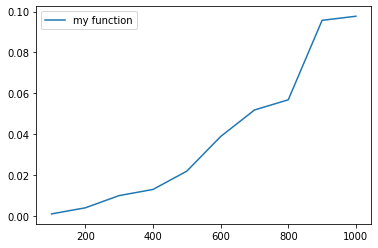

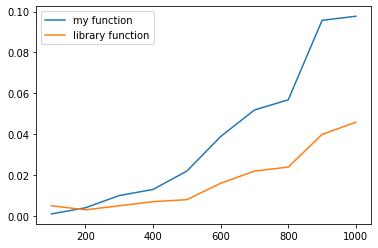

In [14]:
my_times_2, lib_times_2 = test_inverse_power_methods()

## Wnioski:
* czasy działania obu funkcji rosną wraz ze zwiększaniem rozmiaru macierzy
* funkcja biblioteczna działa minimalnie wolniej od zaimplementowanej funkcji dla małych rozmiarów macierzy (do 200), a dla większych rozmiarów - szybciej
* różnica między czasami wykonania obu funkcji rośnie wraz ze zwiększaniem rozmiaru macierzy
* zaimplementowana funkcja i funkcja biblioteczna zwracają taki sam wynik z dokładnością $10^{-8}$
* zaimplementowana funkcja potrzebuje około 2 operacji, aby osiągnąć wynik z podaną wyżej dokładnością dla macierzy o rozmiarach od 100 x 100 do 1000 x 1000

## Podsumowanie

In [15]:
def compare_times(my_times_1, lib_times_1, my_times_2, lib_times_2):
    sizes = [x * 100 for x in range(1, 11)]
    
    plt.plot(sizes, my_times_1, label='my function')
    plt.plot(sizes, my_times_2, label='my inverse function')
    plt.legend()
    plt.show()
    
    plt.plot(sizes, lib_times_1, label='library function')
    plt.plot(sizes, lib_times_2, label='library inverse function')
    plt.legend()
    plt.show()

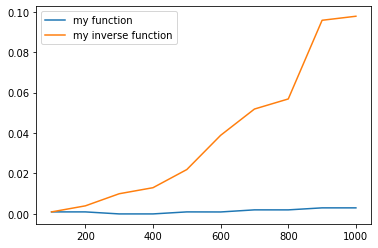

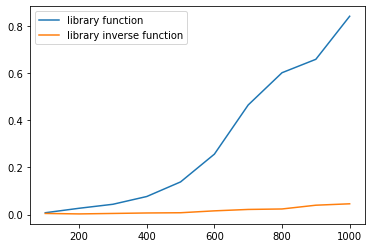

In [16]:
compare_times(my_times_1, lib_times_1, my_times_2, lib_times_2)

## Wnioski:
* zaimplementowana funkcja wykorzystująca odwrotną metodę potęgową działa wolniej niż zaimplementowana funkcja używająca metody potęgowej
* funkcja biblioteczna wykorzystująca odwrotną metodę potęgową działa szybciej niż funkcja biblioteczna używająca metody potęgowej
* wartości i wektory własne macierzy znajdują szerokie zastosowanie, m.in. w algebrze i analizie liniowej, równaniach różniczkowych, podstawach automatyki czy sterowaniu cyfrowym.